### Classifier with Deep Convolutional Neural Network

The sequential order of procceses will be :-  

- training a small network from scratch (as a baseline)  
- using the bottleneck features of a pre-trained network  
- fine-tuning the top layers of a pre-trained network  

## Data

All you need is the train set
The DataSet consist images of 2 animals: Dogs and Cats.
The recommended folder structure is:

### Folder structure

```python
data/
    train/
        dogs/ ### 1024 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 1024 pictures
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/ ### 416 pictures
            dog001.jpg
            dog002.jpg
            ...
        cats/ ### 416 pictures
            cat001.jpg
            cat002.jpg
            ...
```

This project includes about 2048 images for the training model and another 832 images for the purpose of validation. The dataset can be much larger also to improve this model accurancy and efficiency.

### Data loading

In [1]:
##This notebook is built around using tensorflow as the backend for keras
!pip install pillow

In [2]:
##Updated to Keras 2.0
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model
import pydot
import graphviz

Using TensorFlow backend.


In [21]:
#tensorboard = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

### Data Loading

In [6]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

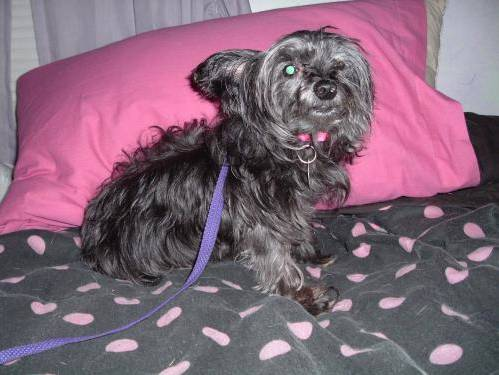

In [7]:
Image(filename='data/train/dogs/dog.0.jpg') 

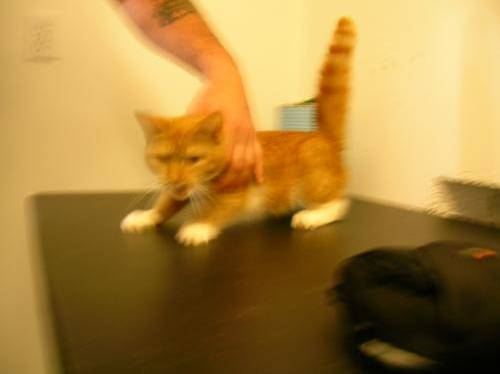

In [8]:
Image(filename='data/train/cats/cat.0.jpg') 

### Imports

In [9]:
##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [10]:
##Preview of training data from the datagenerator
i = 0
for batch in datagen.flow_from_directory(train_data_dir,
        target_size=(img_width, img_height),
        class_mode='binary',batch_size=1,
                          save_to_dir='preview', save_prefix='train', save_format='jpg'):
    i += 1
    if i > 20:
        break  #

Found 2048 images belonging to 2 classes.


In [11]:
!dir preview

 Volume in drive C is Windows10_OS
 Volume Serial Number is 0804-2612

 Directory of C:\Users\user\Documents\Jupyter\image_keras-master\preview

21-Aug-17  03:58 PM    <DIR>          .
21-Aug-17  03:58 PM    <DIR>          ..
03-Aug-17  04:52 PM            14,036 aug2_0_121.jpg
08-Apr-17  09:18 PM            13,340 aug2_0_125.jpg
08-Apr-17  09:18 PM            13,482 aug2_0_1805.jpg
08-Apr-17  09:18 PM            13,108 aug2_0_1983.jpg
08-Apr-17  09:18 PM            13,097 aug2_0_2253.jpg
08-Apr-17  09:18 PM            14,069 aug2_0_3107.jpg
03-Aug-17  04:52 PM            12,825 aug2_0_3968.jpg
08-Apr-17  09:18 PM            13,053 aug2_0_4003.jpg
03-Aug-17  04:52 PM            13,438 aug2_0_4432.jpg
03-Aug-17  04:52 PM            12,950 aug2_0_4506.jpg
08-Apr-17  09:18 PM            13,216 aug2_0_6103.jpg
03-Aug-17  04:52 PM            13,973 aug2_0_6484.jpg
08-Apr-17  09:18 PM            13,237 aug2_0_6544.jpg
08-Apr-17  09:18 PM            13,235 aug2_0_7307.jpg
03-Aug-17  04:52 PM 

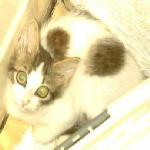

In [12]:
Image(filename='preview/train_12_1168.jpg') 

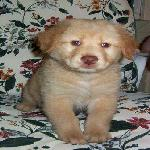

In [13]:
Image(filename='preview/train_9_5143.jpg') 

## Small Conv Net

### Model architecture definition

In [14]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Training

In [16]:
epochs = 30
train_samples = 2048
validation_samples = 832

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)
#About 60 seconds an epoch when using GPU

In [ ]:
model.save_weights('models/basic_cnn_30_epochs.h5')

In [ ]:
#model.save_weights('models_trained/basic_cnn_30_epochs.h5')
model.load_weights('models_trained/basic_cnn_30_epochs.h5')

If your model successfully runs at one epoch, go back and it for 30 epochs by changing nb_epoch above.  I was able to get to an val_acc of 0.71 at 30 epochs.
A copy of a pretrained network is available in the pretrained folder.

### Validating the Model's Performance

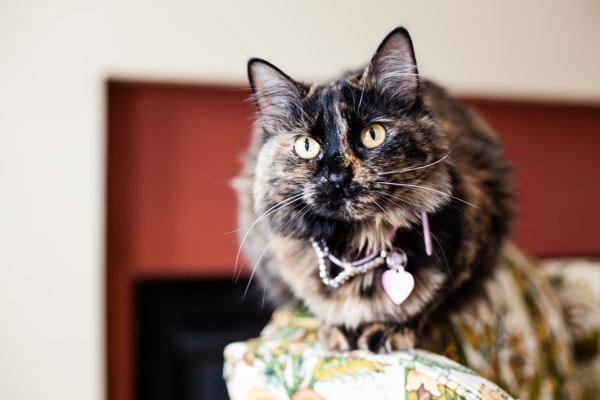

In [19]:
Image(filename='apoorv/alice.jpg')

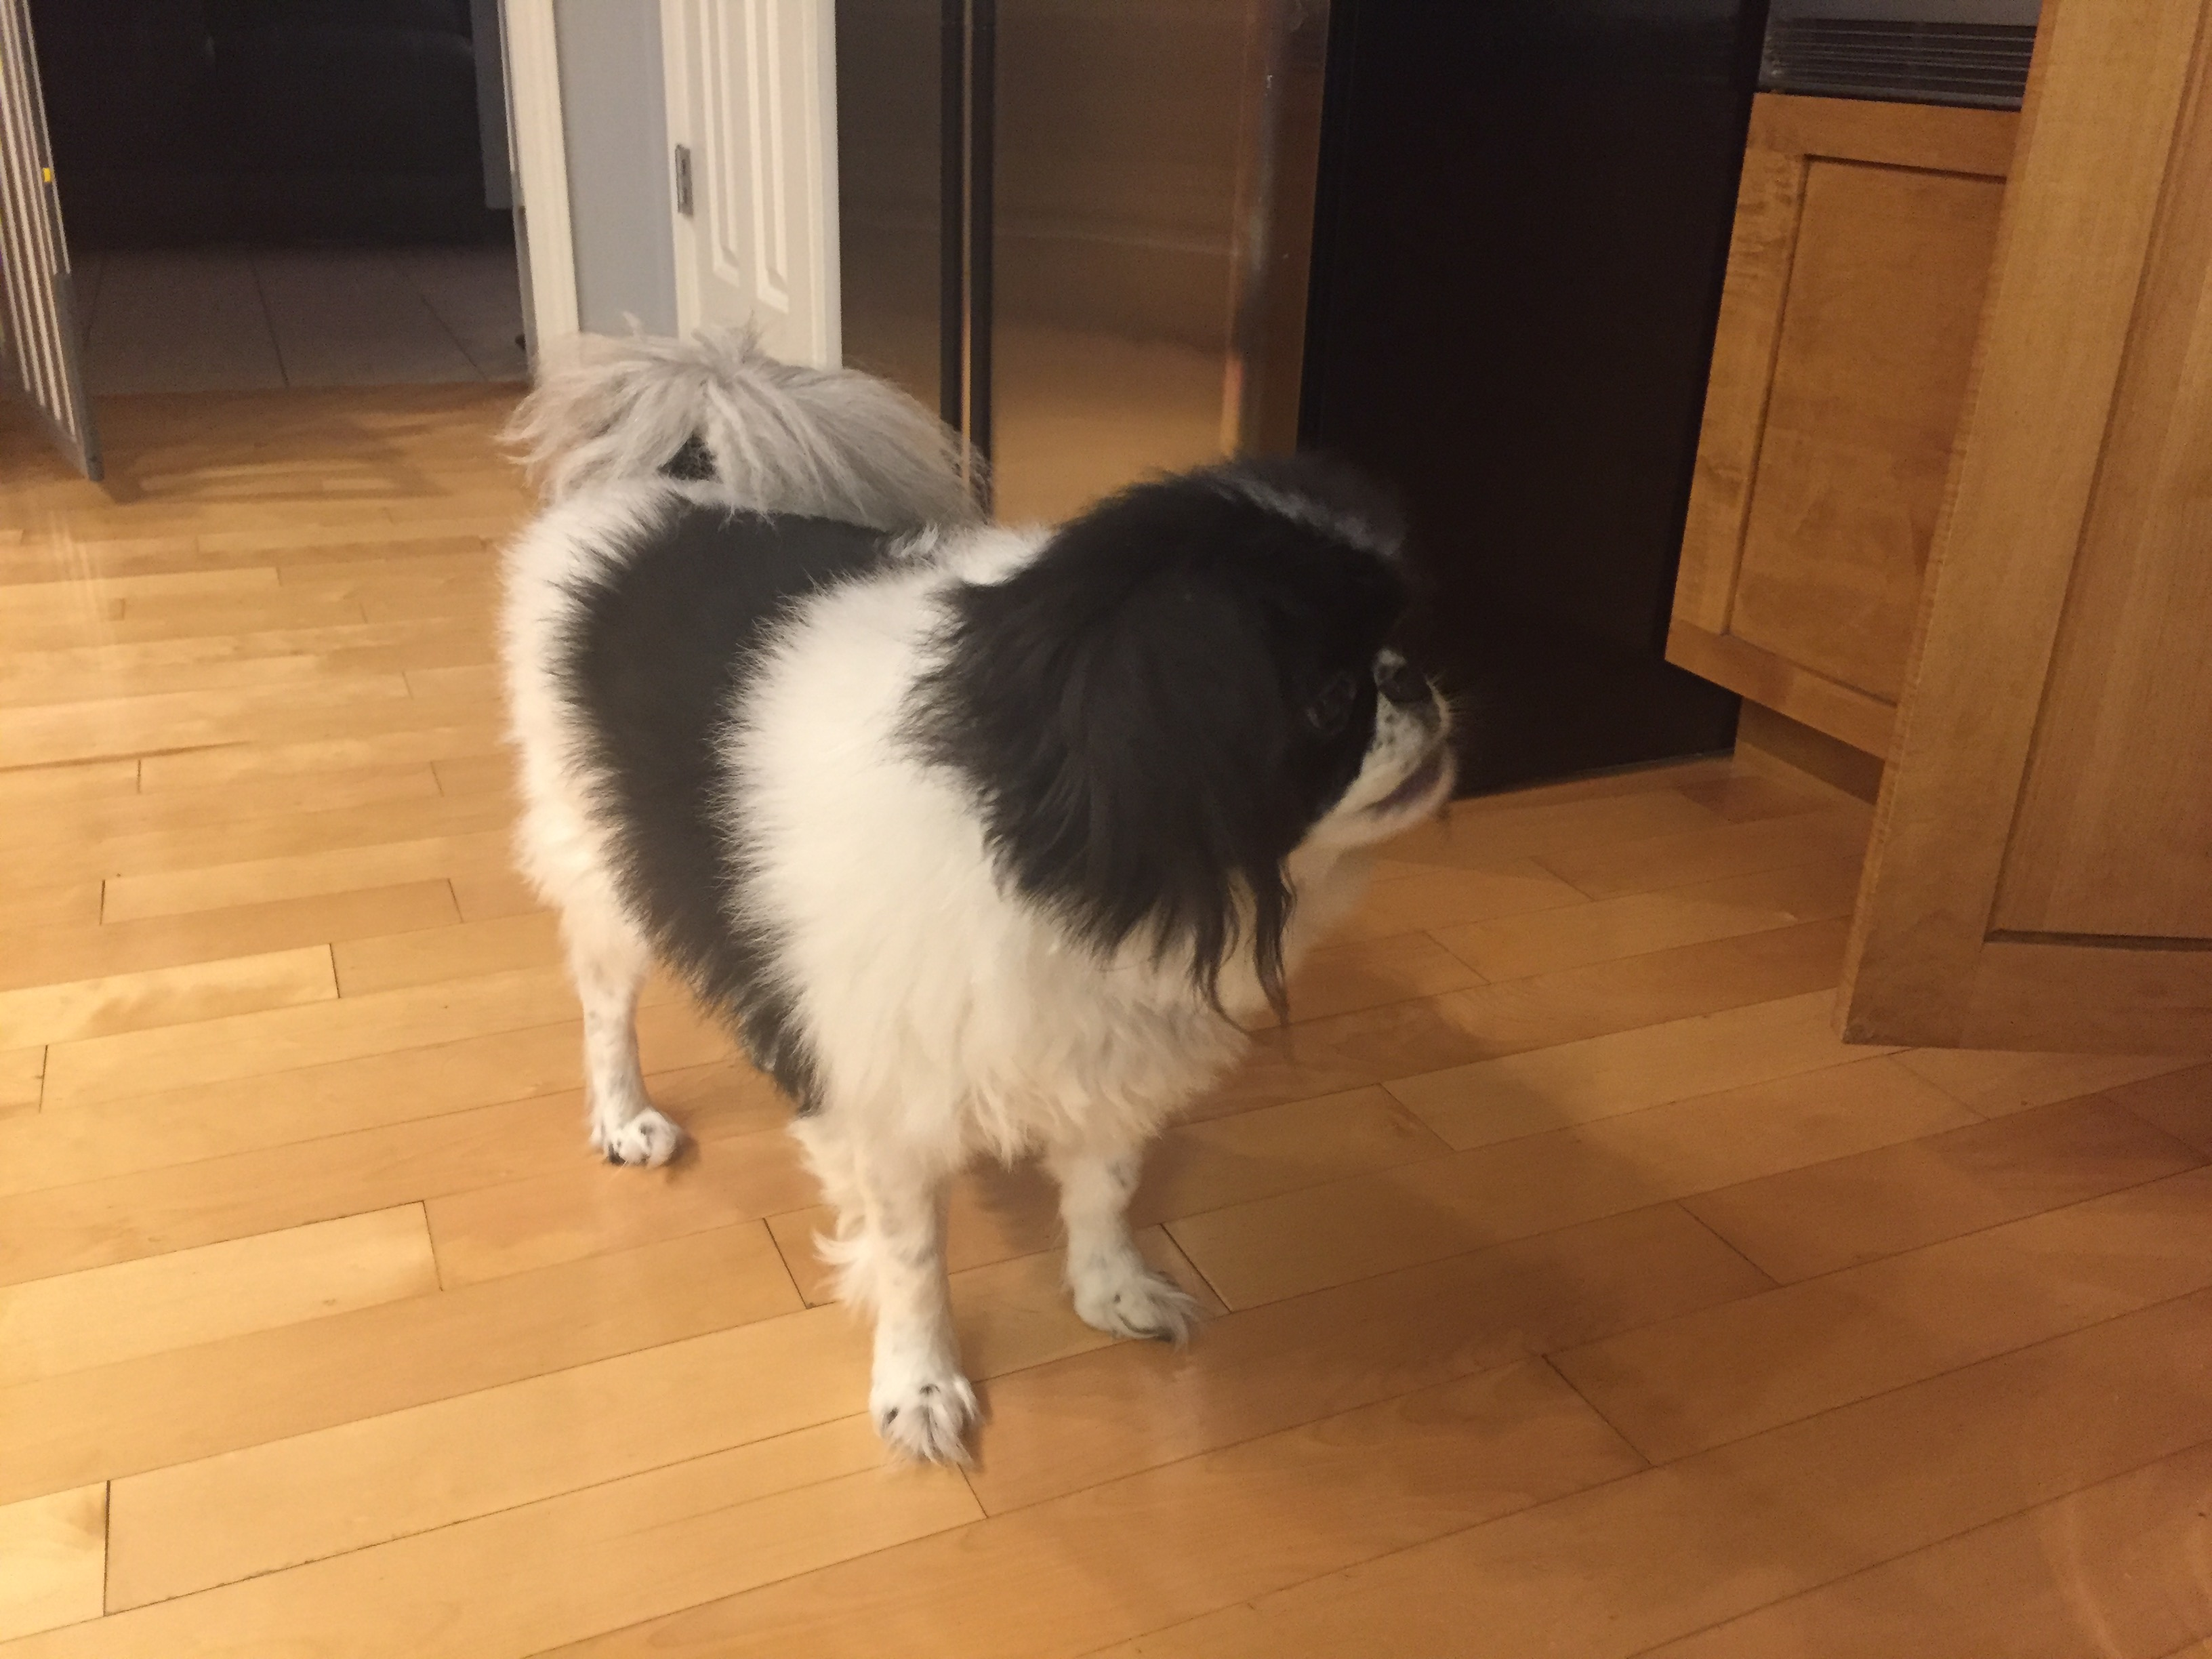

In [22]:
Image(filename='apoorv/huey.jpg') 

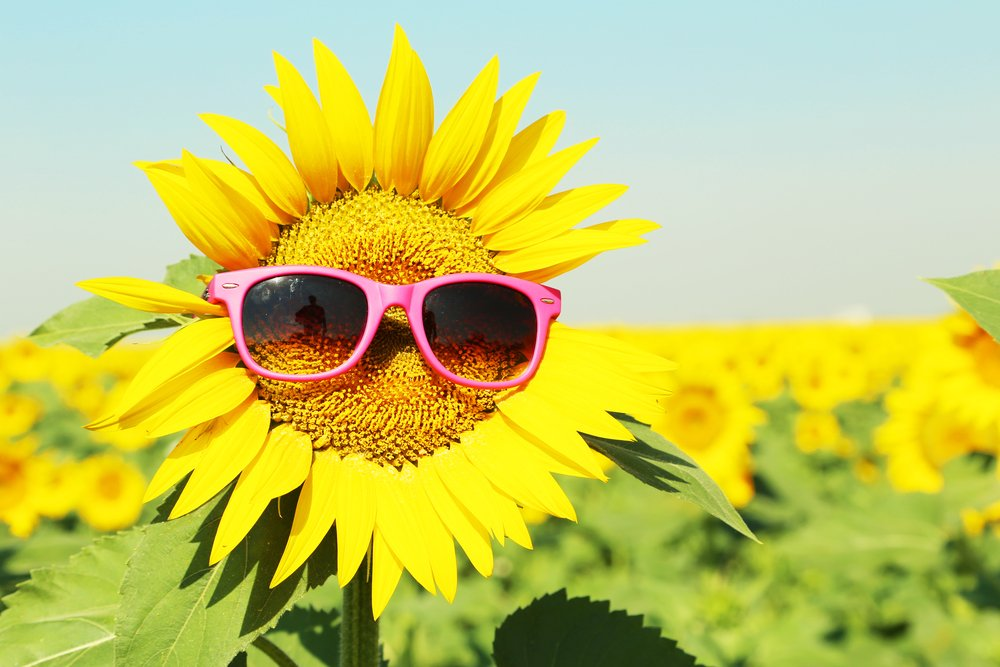

In [24]:
Image(filename='apoorv/vaylen.jpg')

In [66]:
##Need to get prediction working
img = load_img('apoorv/alice.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 0.]]


In [67]:
img = load_img('apoorv/huey.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


In [68]:
img = load_img('apoorv/vaylen.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


### Visualizing a Convolutional Neural Network

### Evaluating on validation set

In [29]:
# Using quiver
#!pip install quiver_engine

In [30]:
from keras.applications.vgg16 import VGG16
model_vgg = VGG16(weights='imagenet', include_top=True)

In [31]:
from quiver_engine import server
#server.launch(model_vgg,input_folder='./apoorv')

Starting webserver from: C:\Program Files\Anaconda3\envs\TensorFlow\lib\site-packages\quiver_engine-0.1.4.1.4-py3.5.egg\quiver_engine


::1 - - [2017-08-21 16:05:10] "GET / HTTP/1.1" 200 830 0.165117
::1 - - [2017-08-21 16:05:10] "GET /app.c1d3d21cfba8c1aabed6806773c8f0ba.css HTTP/1.1" 200 5159 0.403463
::1 - - [2017-08-21 16:05:11] "GET /vendor.280c5ce1d78077ee8d66.js HTTP/1.1" 200 87584 0.076054
::1 - - [2017-08-21 16:05:11] "GET /app.14b8092d6ea379715007.js HTTP/1.1" 200 1179499 0.276504
::1 - - [2017-08-21 16:05:11] "GET /model HTTP/1.1" 200 23654 0.006004
::1 - - [2017-08-21 16:05:11] "GET /inputs HTTP/1.1" 200 205 0.002002
::1 - - [2017-08-21 16:05:11] "GET /input-file/alice.jpg HTTP/1.1" 200 62481 0.050018
::1 - - [2017-08-21 16:05:12] "GET /input-file/huey.jpg HTTP/1.1" 200 1041872 0.441730
::1 - - [2017-08-21 16:05:12] "GET /input-file/tavi.jpg HTTP/1.1" 200 1078773 0.387196
::1 - - [2017-08-21 16:05:12] "GET /input-file/vaylen.jpg HTTP/1.1" 200 98314 0.202548
::1 - - [2017-08-21 16:05:13] "GET /favicon.ico HTTP/1.1" 200 16196 0.032301
[2017-08-21 16:05:22,300] ERROR in app: Exception on /predict/alice.jpg [GE

::1 - - [2017-08-21 16:05:39] "GET /temp-file/block3_conv1_79_alice.jpg.png HTTP/1.1" 200 2097 0.001001
::1 - - [2017-08-21 16:05:39] "GET /temp-file/block3_conv1_82_alice.jpg.png HTTP/1.1" 200 2252 0.003002
::1 - - [2017-08-21 16:05:39] "GET /temp-file/block3_conv1_81_alice.jpg.png HTTP/1.1" 200 2512 0.003000
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_80_alice.jpg.png HTTP/1.1" 200 2500 0.003002
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_83_alice.jpg.png HTTP/1.1" 200 2425 0.004002
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_85_alice.jpg.png HTTP/1.1" 200 2407 0.005996
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_87_alice.jpg.png HTTP/1.1" 200 2573 0.002002
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_86_alice.jpg.png HTTP/1.1" 200 2648 0.002001
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_84_alice.jpg.png HTTP/1.1" 200 2124 0.003002
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_89_al

::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_190_alice.jpg.png HTTP/1.1" 200 2387 0.000000
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_193_alice.jpg.png HTTP/1.1" 200 2336 0.009267
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_194_alice.jpg.png HTTP/1.1" 200 1853 0.003001
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_192_alice.jpg.png HTTP/1.1" 200 2040 0.002001
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_191_alice.jpg.png HTTP/1.1" 200 2318 0.003001
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_196_alice.jpg.png HTTP/1.1" 200 2397 0.003002
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_195_alice.jpg.png HTTP/1.1" 200 2486 0.002001
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_198_alice.jpg.png HTTP/1.1" 200 2373 0.001000
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_conv1_197_alice.jpg.png HTTP/1.1" 200 2232 0.003003
::1 - - [2017-08-21 16:05:40] "GET /temp-file/block3_co

::1 - - [2017-08-21 16:05:55] "GET /layer/predictions/alice.jpg HTTP/1.1" 500 444 2.113083
C:\Program Files\Anaconda3\envs\TensorFlow\lib\site-packages\quiver_engine-0.1.4.1.4-py3.5.egg\quiver_engine\layer_result_generators.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., inputs=Tensor("in...)`
  output=model.get_layer(layer_name).output
[2017-08-21 16:06:03,284] ERROR in app: Exception on /layer/fc2/alice.jpg [GET]
Traceback (most recent call last):
  File "C:\Program Files\Anaconda3\envs\TensorFlow\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Program Files\Anaconda3\envs\TensorFlow\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Program Files\Anaconda3\envs\TensorFlow\lib\site-packages\flask_cors\extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs

::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_43_alice.jpg.png HTTP/1.1" 200 399 0.004000
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_47_alice.jpg.png HTTP/1.1" 200 393 0.012015
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_39_alice.jpg.png HTTP/1.1" 200 390 0.003000
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_35_alice.jpg.png HTTP/1.1" 200 396 0.002994
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_36_alice.jpg.png HTTP/1.1" 200 412 0.002001
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_48_alice.jpg.png HTTP/1.1" 200 399 0.003994
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_46_alice.jpg.png HTTP/1.1" 200 399 0.002002
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_50_alice.jpg.png HTTP/1.1" 200 392 0.002002
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_49_alice.jpg.png HTTP/1.1" 200 407 0.003002
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_51_alice.jpg.png HTTP/1.

::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_166_alice.jpg.png HTTP/1.1" 200 398 0.005995
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_172_alice.jpg.png HTTP/1.1" 200 416 0.002000
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_173_alice.jpg.png HTTP/1.1" 200 405 0.003003
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_174_alice.jpg.png HTTP/1.1" 200 393 0.002003
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_175_alice.jpg.png HTTP/1.1" 200 407 0.001998
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_171_alice.jpg.png HTTP/1.1" 200 416 0.003002
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_177_alice.jpg.png HTTP/1.1" 200 393 0.003994
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_178_alice.jpg.png HTTP/1.1" 200 394 0.003002
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_179_alice.jpg.png HTTP/1.1" 200 401 0.002001
::1 - - [2017-08-21 16:06:09] "GET /temp-file/block5_pool_180_alice.jpg.p

::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_264_alice.jpg.png HTTP/1.1" 200 404 0.004003
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_265_alice.jpg.png HTTP/1.1" 200 390 0.006004
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_261_alice.jpg.png HTTP/1.1" 200 401 0.003002
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_267_alice.jpg.png HTTP/1.1" 200 395 0.003001
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_268_alice.jpg.png HTTP/1.1" 200 397 0.003002
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_266_alice.jpg.png HTTP/1.1" 200 393 0.003001
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_272_alice.jpg.png HTTP/1.1" 200 419 0.003003
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_271_alice.jpg.png HTTP/1.1" 200 395 0.003991
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_270_alice.jpg.png HTTP/1.1" 200 404 0.003003
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_273_alice.jpg.p

::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_357_alice.jpg.png HTTP/1.1" 200 389 0.002004
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_358_alice.jpg.png HTTP/1.1" 200 404 0.006014
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_354_alice.jpg.png HTTP/1.1" 200 394 0.003002
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_360_alice.jpg.png HTTP/1.1" 200 390 0.003001
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_361_alice.jpg.png HTTP/1.1" 200 404 0.003004
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_362_alice.jpg.png HTTP/1.1" 200 411 0.003001
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_363_alice.jpg.png HTTP/1.1" 200 390 0.003002
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_359_alice.jpg.png HTTP/1.1" 200 411 0.003003
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_365_alice.jpg.png HTTP/1.1" 200 419 0.006005
::1 - - [2017-08-21 16:06:10] "GET /temp-file/block5_pool_366_alice.jpg.p

::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_481_alice.jpg.png HTTP/1.1" 200 395 0.003003
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_482_alice.jpg.png HTTP/1.1" 200 408 0.004003
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_483_alice.jpg.png HTTP/1.1" 200 440 0.003002
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_479_alice.jpg.png HTTP/1.1" 200 393 0.005013
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_485_alice.jpg.png HTTP/1.1" 200 391 0.003003
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_486_alice.jpg.png HTTP/1.1" 200 416 0.003003
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_487_alice.jpg.png HTTP/1.1" 200 410 0.002002
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_488_alice.jpg.png HTTP/1.1" 200 390 0.002001
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_484_alice.jpg.png HTTP/1.1" 200 396 0.004994
::1 - - [2017-08-21 16:06:11] "GET /temp-file/block5_pool_490_alice.jpg.p

::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_61_alice.jpg.png HTTP/1.1" 200 482 0.003003
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_59_alice.jpg.png HTTP/1.1" 200 390 0.002002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_64_alice.jpg.png HTTP/1.1" 200 438 0.003002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_65_alice.jpg.png HTTP/1.1" 200 395 0.003003
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_62_alice.jpg.png HTTP/1.1" 200 415 0.003002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_66_alice.jpg.png HTTP/1.1" 200 438 0.003001
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_63_alice.jpg.png HTTP/1.1" 200 409 0.003002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_68_alice.jpg.png HTTP/1.1" 200 396 0.002002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_69_alice.jpg.png HTTP/1.1" 200 403 0.003002
::1 - - [2017-08-21 16:06:16] "GET /temp-file/block5_conv3_70_alice.jpg.p

::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_181_alice.jpg.png HTTP/1.1" 200 390 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_182_alice.jpg.png HTTP/1.1" 200 400 0.004008
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_178_alice.jpg.png HTTP/1.1" 200 393 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_179_alice.jpg.png HTTP/1.1" 200 406 0.002000
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_184_alice.jpg.png HTTP/1.1" 200 390 0.003003
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_185_alice.jpg.png HTTP/1.1" 200 401 0.002001
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_186_alice.jpg.png HTTP/1.1" 200 413 0.005002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_187_alice.jpg.png HTTP/1.1" 200 404 0.003003
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_183_alice.jpg.png HTTP/1.1" 200 432 0.002002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_189_a

::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_268_alice.jpg.png HTTP/1.1" 200 419 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_275_alice.jpg.png HTTP/1.1" 200 405 0.002999
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_274_alice.jpg.png HTTP/1.1" 200 465 0.003003
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_276_alice.jpg.png HTTP/1.1" 200 477 0.002001
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_273_alice.jpg.png HTTP/1.1" 200 393 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_278_alice.jpg.png HTTP/1.1" 200 412 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_279_alice.jpg.png HTTP/1.1" 200 397 0.006004
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_280_alice.jpg.png HTTP/1.1" 200 396 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_277_alice.jpg.png HTTP/1.1" 200 427 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_283_a

::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_366_alice.jpg.png HTTP/1.1" 200 456 0.003001
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_372_alice.jpg.png HTTP/1.1" 200 416 0.002002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_373_alice.jpg.png HTTP/1.1" 200 405 0.003002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_374_alice.jpg.png HTTP/1.1" 200 447 0.002993
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_375_alice.jpg.png HTTP/1.1" 200 390 0.002001
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_371_alice.jpg.png HTTP/1.1" 200 444 0.003003
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_377_alice.jpg.png HTTP/1.1" 200 416 0.002002
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_378_alice.jpg.png HTTP/1.1" 200 403 0.005008
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_379_alice.jpg.png HTTP/1.1" 200 399 0.002000
::1 - - [2017-08-21 16:06:17] "GET /temp-file/block5_conv3_380_a

::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_465_alice.jpg.png HTTP/1.1" 200 471 0.004999
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_462_alice.jpg.png HTTP/1.1" 200 418 0.003002
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_461_alice.jpg.png HTTP/1.1" 200 410 0.003002
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_467_alice.jpg.png HTTP/1.1" 200 390 0.002001
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_468_alice.jpg.png HTTP/1.1" 200 402 0.003003
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_469_alice.jpg.png HTTP/1.1" 200 411 0.003003
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_466_alice.jpg.png HTTP/1.1" 200 390 0.005012
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_470_alice.jpg.png HTTP/1.1" 200 393 0.003002
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_472_alice.jpg.png HTTP/1.1" 200 415 0.003002
::1 - - [2017-08-21 16:06:18] "GET /temp-file/block5_conv3_473_a

::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_54_alice.jpg.png HTTP/1.1" 200 400 0.004003
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_55_alice.jpg.png HTTP/1.1" 200 448 0.002002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_51_alice.jpg.png HTTP/1.1" 200 469 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_57_alice.jpg.png HTTP/1.1" 200 485 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_58_alice.jpg.png HTTP/1.1" 200 506 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_59_alice.jpg.png HTTP/1.1" 200 510 0.002001
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_60_alice.jpg.png HTTP/1.1" 200 433 0.003001
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_56_alice.jpg.png HTTP/1.1" 200 499 0.003000
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_62_alice.jpg.png HTTP/1.1" 200 430 0.002002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_63_alice.jpg.p

::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_174_alice.jpg.png HTTP/1.1" 200 441 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_175_alice.jpg.png HTTP/1.1" 200 415 0.008005
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_171_alice.jpg.png HTTP/1.1" 200 395 0.007004
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_177_alice.jpg.png HTTP/1.1" 200 471 0.003003
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_178_alice.jpg.png HTTP/1.1" 200 506 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_179_alice.jpg.png HTTP/1.1" 200 485 0.004010
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_180_alice.jpg.png HTTP/1.1" 200 480 0.002002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_176_alice.jpg.png HTTP/1.1" 200 415 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_182_alice.jpg.png HTTP/1.1" 200 436 0.003002
::1 - - [2017-08-21 16:06:21] "GET /temp-file/block5_conv2_183_a

::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_255_alice.jpg.png HTTP/1.1" 200 465 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_251_alice.jpg.png HTTP/1.1" 200 451 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_257_alice.jpg.png HTTP/1.1" 200 566 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_258_alice.jpg.png HTTP/1.1" 200 499 0.002001
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_259_alice.jpg.png HTTP/1.1" 200 479 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_260_alice.jpg.png HTTP/1.1" 200 548 0.003003
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_256_alice.jpg.png HTTP/1.1" 200 487 0.004001
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_262_alice.jpg.png HTTP/1.1" 200 513 0.002002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_263_alice.jpg.png HTTP/1.1" 200 486 0.003005
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_264_a

::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_338_alice.jpg.png HTTP/1.1" 200 451 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_339_alice.jpg.png HTTP/1.1" 200 427 0.002002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_342_alice.jpg.png HTTP/1.1" 200 465 0.002001
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_341_alice.jpg.png HTTP/1.1" 200 429 0.003003
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_340_alice.jpg.png HTTP/1.1" 200 446 0.003000
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_345_alice.jpg.png HTTP/1.1" 200 415 0.002000
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_346_alice.jpg.png HTTP/1.1" 200 437 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_343_alice.jpg.png HTTP/1.1" 200 439 0.003002
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_347_alice.jpg.png HTTP/1.1" 200 420 0.005004
::1 - - [2017-08-21 16:06:22] "GET /temp-file/block5_conv2_344_a

::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_448_alice.jpg.png HTTP/1.1" 200 494 0.004002
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_445_alice.jpg.png HTTP/1.1" 200 424 0.006007
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_447_alice.jpg.png HTTP/1.1" 200 505 0.003002
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_446_alice.jpg.png HTTP/1.1" 200 434 0.005009
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_449_alice.jpg.png HTTP/1.1" 200 441 0.004003
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_443_alice.jpg.png HTTP/1.1" 200 525 0.004002
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_451_alice.jpg.png HTTP/1.1" 200 476 0.002002
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_452_alice.jpg.png HTTP/1.1" 200 422 0.006004
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_453_alice.jpg.png HTTP/1.1" 200 491 0.002002
::1 - - [2017-08-21 16:06:23] "GET /temp-file/block5_conv2_454_a

::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_17_alice.jpg.png HTTP/1.1" 200 450 0.004004
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_20_alice.jpg.png HTTP/1.1" 200 454 0.001999
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_23_alice.jpg.png HTTP/1.1" 200 529 0.004002
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_21_alice.jpg.png HTTP/1.1" 200 500 0.003001
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_22_alice.jpg.png HTTP/1.1" 200 479 0.006004
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_25_alice.jpg.png HTTP/1.1" 200 453 0.007010
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_24_alice.jpg.png HTTP/1.1" 200 479 0.005004
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_30_alice.jpg.png HTTP/1.1" 200 497 0.002002
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_29_alice.jpg.png HTTP/1.1" 200 552 0.004007
::1 - - [2017-08-21 16:06:26] "GET /temp-file/block5_conv1_28_alice.jpg.p

::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_122_alice.jpg.png HTTP/1.1" 200 470 0.004003
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_123_alice.jpg.png HTTP/1.1" 200 521 0.003002
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_124_alice.jpg.png HTTP/1.1" 200 434 0.004999
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_125_alice.jpg.png HTTP/1.1" 200 419 0.006015
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_121_alice.jpg.png HTTP/1.1" 200 463 0.002001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_127_alice.jpg.png HTTP/1.1" 200 506 0.003002
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_128_alice.jpg.png HTTP/1.1" 200 484 0.002001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_129_alice.jpg.png HTTP/1.1" 200 492 0.003001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_130_alice.jpg.png HTTP/1.1" 200 531 0.002001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_126_a

::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_218_alice.jpg.png HTTP/1.1" 200 516 0.004005
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_217_alice.jpg.png HTTP/1.1" 200 459 0.003000
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_219_alice.jpg.png HTTP/1.1" 200 446 0.003997
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_221_alice.jpg.png HTTP/1.1" 200 495 0.002002
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_222_alice.jpg.png HTTP/1.1" 200 454 0.005003
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_220_alice.jpg.png HTTP/1.1" 200 478 0.003002
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_223_alice.jpg.png HTTP/1.1" 200 565 0.002001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_224_alice.jpg.png HTTP/1.1" 200 449 0.002001
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_226_alice.jpg.png HTTP/1.1" 200 427 0.003000
::1 - - [2017-08-21 16:06:27] "GET /temp-file/block5_conv1_225_a

::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_303_alice.jpg.png HTTP/1.1" 200 414 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_304_alice.jpg.png HTTP/1.1" 200 454 0.004010
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_305_alice.jpg.png HTTP/1.1" 200 521 0.003003
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_306_alice.jpg.png HTTP/1.1" 200 449 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_302_alice.jpg.png HTTP/1.1" 200 445 0.003003
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_308_alice.jpg.png HTTP/1.1" 200 441 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_309_alice.jpg.png HTTP/1.1" 200 461 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_310_alice.jpg.png HTTP/1.1" 200 433 0.002001
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_311_alice.jpg.png HTTP/1.1" 200 514 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_307_a

::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_389_alice.jpg.png HTTP/1.1" 200 423 0.006004
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_390_alice.jpg.png HTTP/1.1" 200 479 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_391_alice.jpg.png HTTP/1.1" 200 491 0.002001
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_387_alice.jpg.png HTTP/1.1" 200 473 0.003003
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_393_alice.jpg.png HTTP/1.1" 200 499 0.005009
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_394_alice.jpg.png HTTP/1.1" 200 485 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_395_alice.jpg.png HTTP/1.1" 200 537 0.002997
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_396_alice.jpg.png HTTP/1.1" 200 462 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_392_alice.jpg.png HTTP/1.1" 200 442 0.003011
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_398_a

::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_484_alice.jpg.png HTTP/1.1" 200 537 0.004003
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_480_alice.jpg.png HTTP/1.1" 200 472 0.003003
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_486_alice.jpg.png HTTP/1.1" 200 456 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_487_alice.jpg.png HTTP/1.1" 200 437 0.005004
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_488_alice.jpg.png HTTP/1.1" 200 435 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_489_alice.jpg.png HTTP/1.1" 200 549 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_485_alice.jpg.png HTTP/1.1" 200 497 0.002002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_491_alice.jpg.png HTTP/1.1" 200 393 0.003002
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_492_alice.jpg.png HTTP/1.1" 200 427 0.004000
::1 - - [2017-08-21 16:06:28] "GET /temp-file/block5_conv1_493_a

::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_47_alice.jpg.png HTTP/1.1" 200 435 0.003002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_53_alice.jpg.png HTTP/1.1" 200 454 0.003002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_54_alice.jpg.png HTTP/1.1" 200 454 0.003003
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_55_alice.jpg.png HTTP/1.1" 200 544 0.003003
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_56_alice.jpg.png HTTP/1.1" 200 495 0.004005
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_52_alice.jpg.png HTTP/1.1" 200 527 0.003002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_58_alice.jpg.png HTTP/1.1" 200 526 0.002001
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_59_alice.jpg.png HTTP/1.1" 200 456 0.003002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_57_alice.jpg.png HTTP/1.1" 200 531 0.006006
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_63_alice.jpg.png HTTP/1.

::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_142_alice.jpg.png HTTP/1.1" 200 515 0.004002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_143_alice.jpg.png HTTP/1.1" 200 490 0.003001
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_144_alice.jpg.png HTTP/1.1" 200 457 0.004994
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_140_alice.jpg.png HTTP/1.1" 200 531 0.003003
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_146_alice.jpg.png HTTP/1.1" 200 567 0.004003
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_147_alice.jpg.png HTTP/1.1" 200 454 0.003001
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_148_alice.jpg.png HTTP/1.1" 200 484 0.003000
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_149_alice.jpg.png HTTP/1.1" 200 465 0.006005
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_145_alice.jpg.png HTTP/1.1" 200 459 0.003002
::1 - - [2017-08-21 16:06:31] "GET /temp-file/block4_pool_151_alice.jpg.p

::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_231_alice.jpg.png HTTP/1.1" 200 476 0.005003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_232_alice.jpg.png HTTP/1.1" 200 466 0.002002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_233_alice.jpg.png HTTP/1.1" 200 493 0.005008
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_229_alice.jpg.png HTTP/1.1" 200 533 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_235_alice.jpg.png HTTP/1.1" 200 450 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_236_alice.jpg.png HTTP/1.1" 200 454 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_237_alice.jpg.png HTTP/1.1" 200 499 0.003003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_238_alice.jpg.png HTTP/1.1" 200 536 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_234_alice.jpg.png HTTP/1.1" 200 496 0.005003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_240_alice.jpg.p

::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_324_alice.jpg.png HTTP/1.1" 200 502 0.003003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_325_alice.jpg.png HTTP/1.1" 200 546 0.003003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_326_alice.jpg.png HTTP/1.1" 200 493 0.002001
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_322_alice.jpg.png HTTP/1.1" 200 591 0.005004
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_328_alice.jpg.png HTTP/1.1" 200 509 0.002001
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_329_alice.jpg.png HTTP/1.1" 200 512 0.003003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_330_alice.jpg.png HTTP/1.1" 200 538 0.002001
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_331_alice.jpg.png HTTP/1.1" 200 479 0.005003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_327_alice.jpg.png HTTP/1.1" 200 471 0.002000
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_333_alice.jpg.p

::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_417_alice.jpg.png HTTP/1.1" 200 461 0.003004
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_418_alice.jpg.png HTTP/1.1" 200 469 0.004002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_419_alice.jpg.png HTTP/1.1" 200 482 0.003000
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_420_alice.jpg.png HTTP/1.1" 200 477 0.002997
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_416_alice.jpg.png HTTP/1.1" 200 464 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_422_alice.jpg.png HTTP/1.1" 200 468 0.003002
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_423_alice.jpg.png HTTP/1.1" 200 545 0.003003
::1 - - [2017-08-21 16:06:32] "GET /temp-file/block4_pool_424_alice.jpg.png HTTP/1.1" 200 477 0.002001
::1 - - [2017-08-21 16:06:36] "GET /layer/block4_conv2/alice.jpg HTTP/1.1" 200 18979 3.496983
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_pool_421_alice.jpg.png HTTP/1

::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_4_alice.jpg.png HTTP/1.1" 200 856 0.003001
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_7_alice.jpg.png HTTP/1.1" 200 694 0.003002
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_6_alice.jpg.png HTTP/1.1" 200 680 0.003003
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_5_alice.jpg.png HTTP/1.1" 200 835 0.002001
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_8_alice.jpg.png HTTP/1.1" 200 709 0.003001
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_9_alice.jpg.png HTTP/1.1" 200 842 0.003003
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_10_alice.jpg.png HTTP/1.1" 200 641 0.003000
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_11_alice.jpg.png HTTP/1.1" 200 855 0.003002
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_12_alice.jpg.png HTTP/1.1" 200 745 0.003002
::1 - - [2017-08-21 16:06:36] "GET /temp-file/block4_conv2_13_alice.jpg.png HTT

::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_99_alice.jpg.png HTTP/1.1" 200 687 0.004003
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_95_alice.jpg.png HTTP/1.1" 200 882 0.004002
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_91_alice.jpg.png HTTP/1.1" 200 938 0.002001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_97_alice.jpg.png HTTP/1.1" 200 898 0.004003
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_98_alice.jpg.png HTTP/1.1" 200 557 0.003001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_100_alice.jpg.png HTTP/1.1" 200 864 0.003002
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_101_alice.jpg.png HTTP/1.1" 200 760 0.004001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_96_alice.jpg.png HTTP/1.1" 200 746 0.003002
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_105_alice.jpg.png HTTP/1.1" 200 872 0.011008
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_103_alice.j

::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_185_alice.jpg.png HTTP/1.1" 200 704 0.003003
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_186_alice.jpg.png HTTP/1.1" 200 692 0.001999
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_187_alice.jpg.png HTTP/1.1" 200 857 0.003002
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_188_alice.jpg.png HTTP/1.1" 200 673 0.003002
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_184_alice.jpg.png HTTP/1.1" 200 924 0.002999
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_190_alice.jpg.png HTTP/1.1" 200 742 0.002001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_191_alice.jpg.png HTTP/1.1" 200 797 0.003001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_192_alice.jpg.png HTTP/1.1" 200 903 0.002001
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_193_alice.jpg.png HTTP/1.1" 200 875 0.004004
::1 - - [2017-08-21 16:06:37] "GET /temp-file/block4_conv2_189_a

::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_282_alice.jpg.png HTTP/1.1" 200 798 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_283_alice.jpg.png HTTP/1.1" 200 837 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_284_alice.jpg.png HTTP/1.1" 200 705 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_285_alice.jpg.png HTTP/1.1" 200 515 0.002999
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_281_alice.jpg.png HTTP/1.1" 200 558 0.002001
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_287_alice.jpg.png HTTP/1.1" 200 838 0.003003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_288_alice.jpg.png HTTP/1.1" 200 839 0.002002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_289_alice.jpg.png HTTP/1.1" 200 810 0.003001
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_290_alice.jpg.png HTTP/1.1" 200 806 0.002998
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_286_a

::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_372_alice.jpg.png HTTP/1.1" 200 762 0.005003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_370_alice.jpg.png HTTP/1.1" 200 823 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_374_alice.jpg.png HTTP/1.1" 200 797 0.003003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_377_alice.jpg.png HTTP/1.1" 200 773 0.002002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_373_alice.jpg.png HTTP/1.1" 200 954 0.003003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_376_alice.jpg.png HTTP/1.1" 200 844 0.005004
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_375_alice.jpg.png HTTP/1.1" 200 812 0.003000
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_379_alice.jpg.png HTTP/1.1" 200 844 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_380_alice.jpg.png HTTP/1.1" 200 800 0.003001
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_381_a

::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_465_alice.jpg.png HTTP/1.1" 200 822 0.004003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_467_alice.jpg.png HTTP/1.1" 200 817 0.006003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_463_alice.jpg.png HTTP/1.1" 200 851 0.003001
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_469_alice.jpg.png HTTP/1.1" 200 860 0.003002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_470_alice.jpg.png HTTP/1.1" 200 811 0.003003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_471_alice.jpg.png HTTP/1.1" 200 871 0.002002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_472_alice.jpg.png HTTP/1.1" 200 827 0.003003
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_468_alice.jpg.png HTTP/1.1" 200 662 0.002002
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_474_alice.jpg.png HTTP/1.1" 200 660 0.002998
::1 - - [2017-08-21 16:06:38] "GET /temp-file/block4_conv2_475_a

::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_52_alice.jpg.png HTTP/1.1" 200 838 0.003004
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_53_alice.jpg.png HTTP/1.1" 200 914 0.002996
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_49_alice.jpg.png HTTP/1.1" 200 896 0.003002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_55_alice.jpg.png HTTP/1.1" 200 956 0.003002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_56_alice.jpg.png HTTP/1.1" 200 863 0.003002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_54_alice.jpg.png HTTP/1.1" 200 815 0.004002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_58_alice.jpg.png HTTP/1.1" 200 908 0.004002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_61_alice.jpg.png HTTP/1.1" 200 699 0.003004
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_60_alice.jpg.png HTTP/1.1" 200 623 0.003002
::1 - - [2017-08-21 16:06:45] "GET /temp-file/block4_conv1_59_alice.jpg.p

::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_177_alice.jpg.png HTTP/1.1" 200 910 0.003003
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_173_alice.jpg.png HTTP/1.1" 200 648 0.002002
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_179_alice.jpg.png HTTP/1.1" 200 989 0.005006
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_180_alice.jpg.png HTTP/1.1" 200 742 0.003001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_181_alice.jpg.png HTTP/1.1" 200 979 0.002001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_182_alice.jpg.png HTTP/1.1" 200 864 0.002003
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_178_alice.jpg.png HTTP/1.1" 200 861 0.003001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_184_alice.jpg.png HTTP/1.1" 200 960 0.002001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_185_alice.jpg.png HTTP/1.1" 200 845 0.002998
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_186_a

::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_273_alice.jpg.png HTTP/1.1" 200 913 0.005005
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_279_alice.jpg.png HTTP/1.1" 200 850 0.003002
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_280_alice.jpg.png HTTP/1.1" 200 976 0.003001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_281_alice.jpg.png HTTP/1.1" 200 842 0.003001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_282_alice.jpg.png HTTP/1.1" 200 820 0.006003
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_278_alice.jpg.png HTTP/1.1" 200 798 0.002002
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_284_alice.jpg.png HTTP/1.1" 200 952 0.003003
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_285_alice.jpg.png HTTP/1.1" 200 915 0.002001
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_286_alice.jpg.png HTTP/1.1" 200 742 0.003003
::1 - - [2017-08-21 16:06:46] "GET /temp-file/block4_conv1_287_a

::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_387_alice.jpg.png HTTP/1.1" 200 800 0.004003
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_393_alice.jpg.png HTTP/1.1" 200 872 0.007009
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_394_alice.jpg.png HTTP/1.1" 200 813 0.005014
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_395_alice.jpg.png HTTP/1.1" 200 870 0.009004
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_396_alice.jpg.png HTTP/1.1" 200 964 0.006004
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_392_alice.jpg.png HTTP/1.1" 200 875 0.005003
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_398_alice.jpg.png HTTP/1.1" 200 751 0.007005
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_399_alice.jpg.png HTTP/1.1" 200 810 0.003003
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_400_alice.jpg.png HTTP/1.1" 200 594 0.002999
::1 - - [2017-08-21 16:06:51] "GET /temp-file/block4_conv1_401_a

::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_24_alice.jpg.png HTTP/1.1" 200 774 0.003000
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_36_alice.jpg.png HTTP/1.1" 200 903 0.008006
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_25_alice.jpg.png HTTP/1.1" 200 895 0.005997
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_29_alice.jpg.png HTTP/1.1" 200 1073 0.004002
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_21_alice.jpg.png HTTP/1.1" 200 879 0.005004
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_32_alice.jpg.png HTTP/1.1" 200 926 0.003002
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_33_alice.jpg.png HTTP/1.1" 200 835 0.003002
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_13_alice.jpg.png HTTP/1.1" 200 911 0.006004
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_0_alice.jpg.png HTTP/1.1" 200 846 0.009009
::1 - - [2017-08-21 16:06:52] "GET /temp-file/block3_pool_41_alice.jpg.png HTTP/1.

::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_114_alice.jpg.png HTTP/1.1" 200 881 0.018013
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_99_alice.jpg.png HTTP/1.1" 200 709 0.014019
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_110_alice.jpg.png HTTP/1.1" 200 908 0.004999
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_97_alice.jpg.png HTTP/1.1" 200 822 0.007004
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_118_alice.jpg.png HTTP/1.1" 200 865 0.006003
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_145_alice.jpg.png HTTP/1.1" 200 879 0.003002
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_149_alice.jpg.png HTTP/1.1" 200 965 0.004003
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_155_alice.jpg.png HTTP/1.1" 200 953 0.002994
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_117_alice.jpg.png HTTP/1.1" 200 867 0.003003
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_92_alice.jpg.png 

::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_226_alice.jpg.png HTTP/1.1" 200 854 0.005004
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_228_alice.jpg.png HTTP/1.1" 200 752 0.003001
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_229_alice.jpg.png HTTP/1.1" 200 752 0.006006
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_230_alice.jpg.png HTTP/1.1" 200 845 0.006004
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_221_alice.jpg.png HTTP/1.1" 200 1005 0.003001
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_227_alice.jpg.png HTTP/1.1" 200 893 0.003002
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_231_alice.jpg.png HTTP/1.1" 200 809 0.005003
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_224_alice.jpg.png HTTP/1.1" 200 927 0.003998
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_233_alice.jpg.png HTTP/1.1" 200 883 0.005004
::1 - - [2017-08-21 16:06:53] "GET /temp-file/block3_pool_225_alice.jpg.

KeyboardInterrupt
Mon Aug 21 16:09:04 2017


KeyboardInterrupt: 

Computing loss and accuracy :

In [32]:
model.evaluate_generator(validation_generator, validation_samples)

[1.6148504226987894, 0.71754807692307687]

Evolution of accuracy on training (blue) and validation (green) sets for 1 to 30 epochs :

![Accuracy evolution](pictures/scores_no_dataaugmentation.png)

**After ~10 epochs the neural network reach ~70% accuracy. We can witness overfitting, no progress is made over validation set in the next epochs**

## Data augmentation for improving the model

By applying random transformation to our train set, we artificially enhance our dataset with new unseen images.  
This will hopefully reduce overfitting and allows better generalization capability for our network.

Example of data augmentation applied to a picture:
![Example of data augmentation applied to a picture](pictures/cat_data_augmentation.png)

In [33]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2048 images belonging to 2 classes.


In [34]:
##Lets look at the training data
img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  

i = 0
for batch in train_datagen_augmented.flow(x,batch_size=1,
                          save_to_dir='preview', save_prefix='aug2', save_format='jpg'):
    i += 1
    if i > 5:
        break  #

In [35]:
!dir preview

 Volume in drive C is Windows10_OS
 Volume Serial Number is 0804-2612

 Directory of C:\Users\user\Documents\Jupyter\image_keras-master\preview

21-Aug-17  04:11 PM    <DIR>          .
21-Aug-17  04:11 PM    <DIR>          ..
03-Aug-17  04:52 PM            14,036 aug2_0_121.jpg
08-Apr-17  09:18 PM            13,340 aug2_0_125.jpg
21-Aug-17  04:11 PM            13,383 aug2_0_156.jpg
21-Aug-17  04:11 PM            13,642 aug2_0_1749.jpg
08-Apr-17  09:18 PM            13,482 aug2_0_1805.jpg
08-Apr-17  09:18 PM            13,108 aug2_0_1983.jpg
21-Aug-17  04:11 PM            14,271 aug2_0_2042.jpg
08-Apr-17  09:18 PM            13,097 aug2_0_2253.jpg
08-Apr-17  09:18 PM            14,069 aug2_0_3107.jpg
03-Aug-17  04:52 PM            12,825 aug2_0_3968.jpg
08-Apr-17  09:18 PM            13,053 aug2_0_4003.jpg
21-Aug-17  04:11 PM            13,448 aug2_0_4213.jpg
03-Aug-17  04:52 PM            13,438 aug2_0_4432.jpg
03-Aug-17  04:52 PM            12,950 aug2_0_4506.jpg
08-Apr-17  09:18 PM  

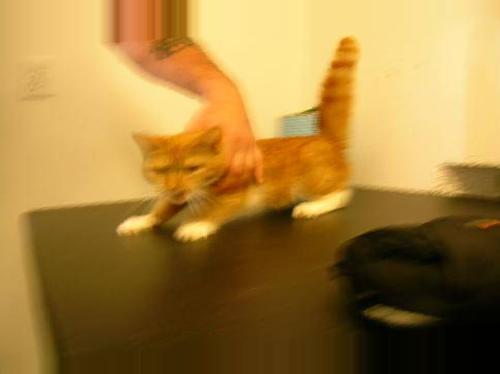

In [36]:
Image(filename='preview/aug2_0_125.jpg') 

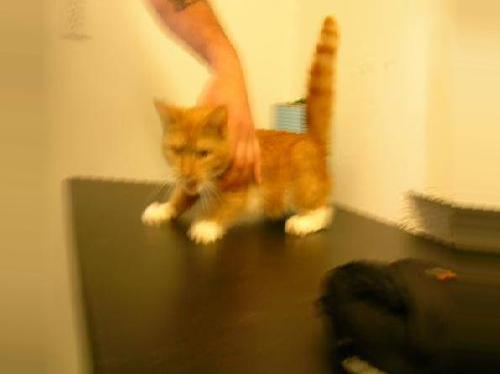

In [37]:
Image(filename='preview/aug2_0_2253.jpg')

In [ ]:
model.fit_generator(
        train_generator_augmented,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples // batch_size,)

In [ ]:
model.save_weights('models/augmented_30_epochs.h5')

In [38]:
model.load_weights('models_trained/augmented_30_epochs.h5')

### Evaluating on validation set

Computing loss and accuracy :

In [40]:
model.evaluate_generator(validation_generator, validation_samples)

[0.57629482501831197, 0.75717397836538458]

Evolution of accuracy on training (blue) and validation (green) sets for 1 to 100 epochs :

![Accuracy evolution](pictures/scores_with_dataaugmentation.png)

**Thanks to data-augmentation, the accuracy on the validation set improved to ~80%**

## Using a pre-trained model

The process of training a convolutionnal neural network can be very time-consuming and require a lot of datas.  

We can go beyond the previous models in terms of performance and efficiency by using a general-purpose, pre-trained image classifier.  This example uses VGG16, a model trained on the ImageNet dataset - which contains millions of images classified in 1000 categories. 

On top of it, we add a small multi-layer perceptron and we train it on our dataset.

### VGG16 + small MLP
![VGG16 + Dense layers Schema](pictures/vgg16_original.png)

#### VGG16 model is available in Keras

In [41]:
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

### Using the VGG16 model to process samples

In [42]:
train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


This is a long process, so we save the output of the VGG16 once and for all.  

In [43]:
bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, train_samples // batch_size)
np.save(open('models/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

In [44]:
bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, validation_samples // batch_size)
np.save(open('models/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

Now we can load it...

In [45]:
train_data = np.load(open('models/bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * (train_samples // 2) + [1] * (train_samples // 2))

validation_data = np.load(open('models/bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (validation_samples // 2) + [1] * (validation_samples // 2))

And define and train the custom fully connected neural network :

In [46]:
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))

model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_top.fit(train_data, train_labels,
        epochs=epochs, 
        batch_size=batch_size,
        validation_data=(validation_data, validation_labels))

The training process of this small neural network is very fast : ~2s per epoch

In [ ]:
model_top.save_weights('models/bottleneck_30_epochs.h5')

### Bottleneck model evaluation

In [48]:
model_top.load_weights('models/bottleneck_30_epochs.h5')

Loss and accuracy :

In [49]:
model_top.evaluate(validation_data, validation_labels)

800/832 [===========================>..] - ETA: 0s

[0.62557321922996867, 0.90745192307692313]

Evolution of accuracy on training (blue) and validation (green) sets for 1 to 32 epochs :

![Accuracy evolution](pictures/scores_with_bottleneck.png)

**We reached a 90% accuracy on the validation after ~1m of training (~20 epochs) and 8% of the samples originally available on the Kaggle competition !**

## Fine-tuning the top layers of a a pre-trained network

Start by instantiating the VGG base and loading its weights.

In [50]:
model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Build a classifier model to put on top of the convolutional model. For the fine tuning, we start with a fully trained-classifer. We will use the weights from the earlier model. And then we will add this model on top of the convolutional base.

In [51]:
top_model = Sequential()
top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

top_model.load_weights('models/bottleneck_30_epochs.h5')

#model_vgg.add(top_model)
model = Model(inputs = model_vgg.input, outputs = top_model(model_vgg.output))

For fine turning, we only want to train a few layers.  This line will set the first 25 layers (up to the conv block) to non-trainable.

In [52]:
for layer in model_vgg.layers[:15]:
    layer.trainable = False

In [53]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [54]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [ ]:
# fine-tune the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

In [ ]:
model.save_weights('models/finetuning_30epochs_vgg.h5')

In [55]:
model.load_weights('models/finetuning_30epochs_vgg.h5')

### Evaluating on validation set

Computing loss and accuracy :

In [69]:
model.evaluate_generator(validation_generator, validation_samples)

[0.33177334231634004, 0.92657001201923073]

In [73]:
##Need to get prediction working
img = load_img('apoorv/alice.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
#probability = model.predict_proba(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)
#print(probability)

[[ 0.]]
